In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
fname = "DATA/data_t-SNE_310101_d5_R100_e1_N800.dat"
data = np.loadtxt(fname, delimiter='\t')

In [3]:
N = len(data)
red = data[0:int(N*0.10)]
green = data[int(N*0.10):int(N*0.40)]
blue = data[int(N*0.40):N]
print("RED: ", len(red), "\nGREEN: ", len(green), "\nBLUE: ", len(blue) )
y_true = np.concatenate(([0]*len(red), [1]*len(green), [2]*len(blue)))
print(y_true)

RED:  80 
GREEN:  240 
BLUE:  480
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

### t-SNE

In [4]:
perplexity = [5,30,50,100]
X_embedded = [[None]*len(data)]*len(perplexity)

In [5]:
i = 0
for p in perplexity:
    X_embedded[i] = TSNE(n_components=2, perplexity = p).fit_transform(data)
    i += 1

In [6]:
print(np.array(X_embedded).shape)
X_embedded = np.array(X_embedded)

(4, 800, 2)


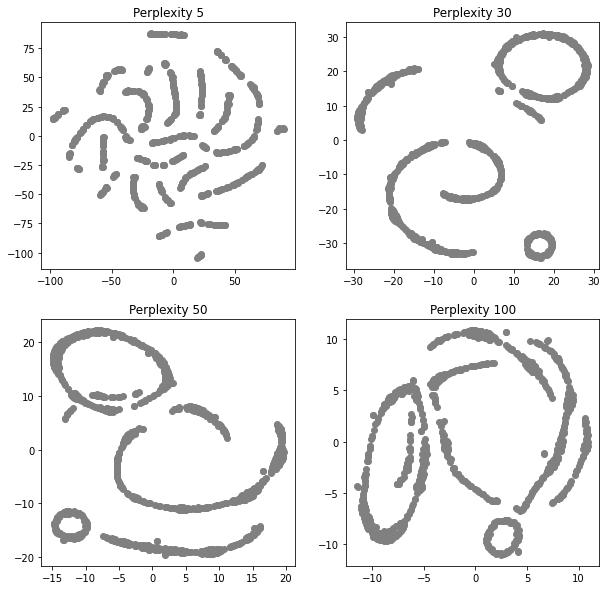

In [7]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
axs[0][0].scatter(X_embedded[0,:,0], X_embedded[0,:,1], c = 'grey')
axs[0][0].set_title('Perplexity {}'.format(perplexity[0]))

axs[0][1].scatter(X_embedded[1,:,0], X_embedded[1,:,1], c = 'grey')
axs[0][1].set_title('Perplexity {}'.format(perplexity[1]))

axs[1][0].scatter(X_embedded[2,:,0], X_embedded[2,:,1], c = 'grey')
axs[1][0].set_title('Perplexity {}'.format(perplexity[2]))

axs[1][1].scatter(X_embedded[3,:,0], X_embedded[3,:,1], c = 'grey')
axs[1][1].set_title('Perplexity {}'.format(perplexity[3]))

plt.show()

### DBSCAN and t-SNE combined

In [8]:
print(data.shape)
d = []
for i in range(len(data)):
    m = []
    for j in range(len(data)):
        if np.all(j != i):
            m.append(np.linalg.norm(data[i] - data[j]))
    d.append(np.min(m))
eps_mean1 = np.mean(d)
print(eps_mean1)

(800, 5)
2835.7419031856784


In [9]:
d = []
for i in range(len(data)-1):
    d.append(np.linalg.norm(data[i+1]-data[i]))
eps_mean2 = np.mean(d)
print(eps_mean2)

115244.76776557221


In [10]:
from scipy.spatial.distance import pdist
eps_mean3 = np.mean(pdist(data))
print(eps_mean3)

148003.9246863126


In [11]:
from collections import OrderedDict

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

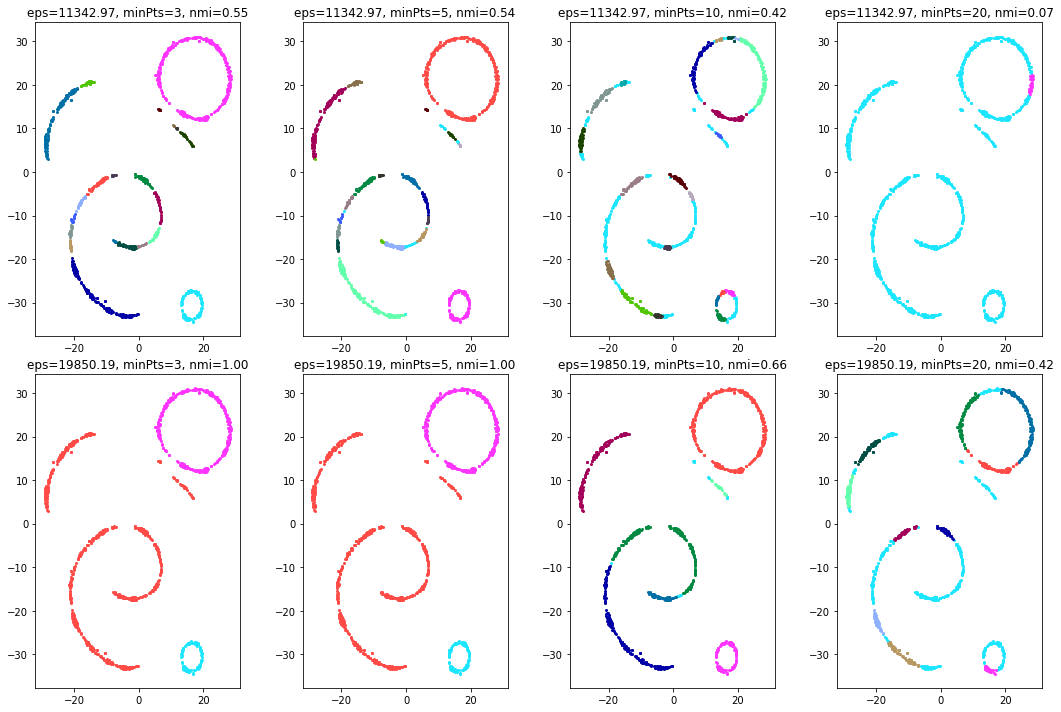

In [12]:
from sklearn.cluster import DBSCAN
import seaborn as sns
cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=4)

# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
np.random.seed(0)
X = X_embedded[1,:,:]
eps_range = [eps_mean1*4, eps_mean1*7]
min_sample_range = [3,5,10,20]
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,10))
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data)
        y = model.labels_
        nmi=NMI(y, y_true)
        plotting_ax(X,y,ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()

### t-SNE on PCA reduced data

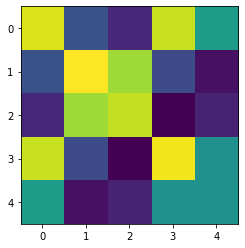

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
cov = pca.get_covariance()
plt.imshow(cov)
plt.show()

In [14]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data)
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result)

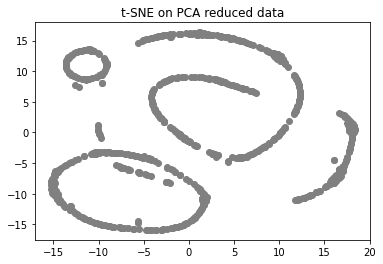

In [15]:
plt.scatter(tsne_pca_results[:,0],tsne_pca_results[:,1], c = "grey")
plt.title("t-SNE on PCA reduced data")
plt.show()

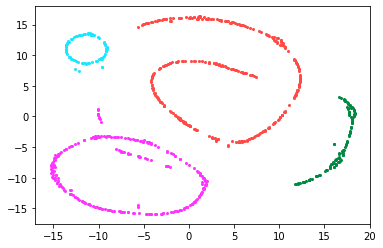

In [16]:
model = DBSCAN(eps=3, min_samples=3)
model.fit(tsne_pca_results)
y = model.labels_
for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        plt.scatter(tsne_pca_results[pos,0], tsne_pca_results[pos,1],c=cpalette[i%len(cpalette)],s=4)
plt.show()

### t-SNE in 3D

In [17]:
from mpl_toolkits.mplot3d import Axes3D
tsne = TSNE(n_components=3, verbose=0, perplexity=70, n_iter=300)
X = tsne.fit_transform(pca_result)

<IPython.core.display.Javascript object>


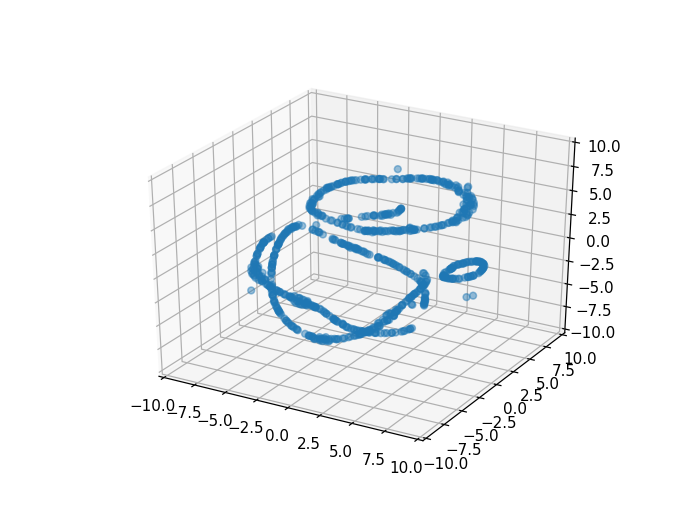

In [18]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
plt.show()